<a href="https://colab.research.google.com/github/Vaani64/Deep_Learning_Codes/blob/main/Implement_RNN_In_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Validation data shape: (10000, 28, 28)
Number of epochs: 10
Batch size: 64
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.7635 - loss: 0.7065
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.9525 - loss: 0.1700
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.9625 - loss: 0.1346
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9693 - loss: 0.1092
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9704 - loss: 0.1087
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9745 - loss: 0.0911
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9757 - loss: 0.0885
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.9760 - loss: 0.0868
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9785 - loss: 0.0792
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9795 - loss: 0.0764
313/313

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


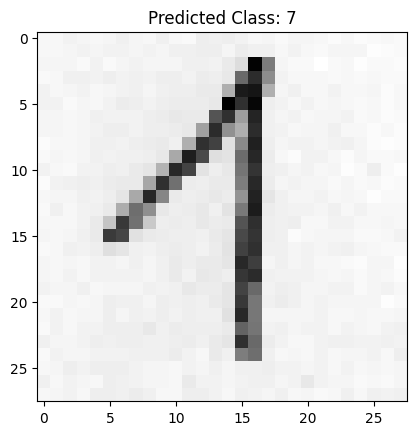

Predicted Class: 7


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Normalize the input data to range [0, 1]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# RNN expects sequential data, so we treat each row of the image as a timestamp
timestamp = x_train.shape[1]
input_dim = x_train.shape[2]

# Build the RNN model
model = Sequential([
    SimpleRNN(300, input_shape=(timestamp, input_dim), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Debug: Check data shape and parameters
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_test.shape}")
print(f"Number of epochs: 10")
print(f"Batch size: 64")

# Train the model for 10 epochs (without validation_split for simplicity)
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    # Load image with size 28x28, as MNIST images are 28x28 pixels
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    # Convert image to numpy array
    img_array = image.img_to_array(img)
    # Normalize the image to the range [0, 1]
    img_array = img_array / 255.0
    # Reshape image to match the shape (1, 28, 28) - 1 sample, 28x28 pixels
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make prediction
def predict_image(model, img_array):
    # Predict the image class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


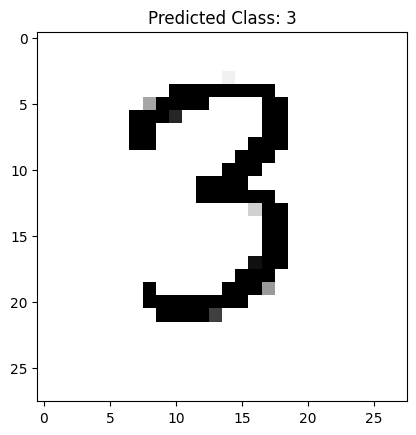

Predicted Class: 3


In [26]:
# Path to your image (replace with the path to the image you want to classify)
img_path = '/content/images.png'  # Replace with the path to your image

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make the prediction
predicted_class = predict_image(model, img_array)

# Display the image and the predicted label
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

print(f'Predicted Class: {predicted_class}')
